<a href="https://colab.research.google.com/github/Abhay182005dat/My_TensorFlow_Learning/blob/main/customerchurnDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('churn.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df , columns = ['Geography' , 'Gender'] , drop_first = True)

In [ ]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy' , optimizer='Adam',metrics =['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100,validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7610 - loss: 0.5927 - val_accuracy: 0.7994 - val_loss: 0.4693
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.4724 - val_accuracy: 0.8175 - val_loss: 0.4216
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8085 - loss: 0.4316 - val_accuracy: 0.8344 - val_loss: 0.4071
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8228 - loss: 0.4231 - val_accuracy: 0.8394 - val_loss: 0.3957
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8316 - loss: 0.4027 - val_accuracy: 0.8425 - val_loss: 0.3882
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8305 - loss: 0.4007 - val_accuracy: 0.8500 - val_loss: 0.3821
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.4008 - val_accuracy: 0.8531 - val_loss: 0.3741
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8486 - loss: 0.3774 - val_accu

In [ ]:
model.layers[1].get_weights()
# weights of layer 1

[array([[-0.59668344,  0.22070728, -0.34256575, -0.13872693, -0.13577989,
          0.51051223, -0.09844787, -0.44041887,  0.24322759,  0.29266945,
         -1.0482355 ],
        [ 0.10807897,  0.14796814,  0.33604193,  0.39833683,  0.7251299 ,
          0.02744134, -0.34777102,  0.19269973,  0.35933435, -1.478079  ,
         -0.44969606],
        [ 0.35955262,  0.21366362,  0.39322433,  0.2265998 ,  0.46935314,
          0.166743  ,  0.60476255, -0.08863034, -0.79443747, -0.25666478,
          0.3088058 ],
        [ 0.22455975, -0.02364627,  0.1415239 ,  0.5914481 ,  0.3715104 ,
          0.5235531 , -0.27825084,  0.4312199 , -0.5291242 ,  0.19299102,
          0.35328054],
        [ 0.6863734 , -0.55169487, -0.08722474, -0.09615541, -0.18175077,
          0.1243403 , -0.47084397, -0.895539  , -0.03379734,  0.47495165,
         -0.13487619],
        [ 0.45108694,  0.17680444,  0.22490306,  0.17153572,  0.41194683,
         -0.38225654,  0.5331891 ,  0.13304023, -0.82770085,  0.2013486

In [ ]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.861

In [ ]:
history.history

{'accuracy': [0.7850000262260437,
  0.8001562356948853,
  0.8157812356948853,
  0.8279687762260437,
  0.8339062333106995,
  0.8364062309265137,
  0.8432812690734863,
  0.8506249785423279,
  0.8528125286102295,
  0.8565624952316284,
  0.8568750023841858,
  0.8571875095367432,
  0.8590624928474426,
  0.8567187786102295,
  0.8584374785423279,
  0.859375,
  0.8575000166893005,
  0.8592187762260437,
  0.8598437309265137,
  0.8604687452316284,
  0.8592187762260437,
  0.8606250286102295,
  0.8604687452316284,
  0.8634374737739563,
  0.8615624904632568,
  0.8626562356948853,
  0.8612499833106995,
  0.8617187738418579,
  0.8600000143051147,
  0.8606250286102295,
  0.8615624904632568,
  0.8620312213897705,
  0.8615624904632568,
  0.8620312213897705,
  0.858593761920929,
  0.8623437285423279,
  0.8631250262260437,
  0.8637499809265137,
  0.8626562356948853,
  0.8623437285423279,
  0.8620312213897705,
  0.8635937571525574,
  0.8639062643051147,
  0.862500011920929,
  0.862500011920929,
  0.8645312

In [ ]:
from matplotlib import pyplot as plt

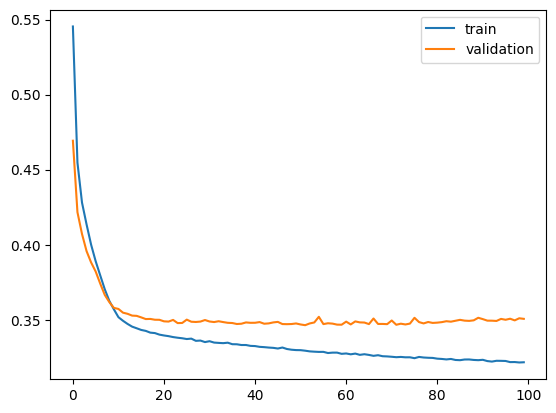

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show() # the gap at the end between blue and orange shows the overfitting level of our model

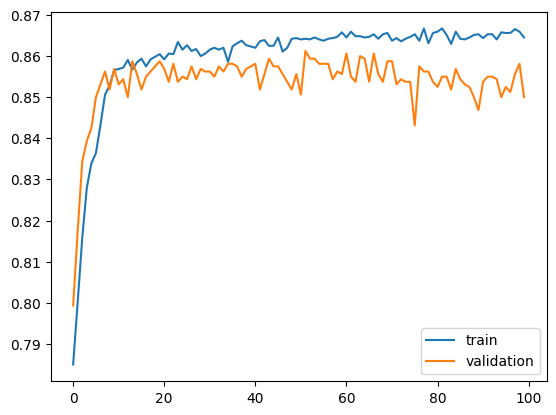

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()